<a href="https://colab.research.google.com/github/nebulous05/influence-functions-pytorch/blob/main/mnist_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### PROCEDURE ###

# Step 1: Train a model on the 10-class MNIST dataset
# Step 2: Arbitrarily select a wrongly-classified test point, z_test
# Step 3: Compute the influence I_up,loss(z, z_test) for every training point z
# Step 4: Select the 500 training points with the largest |I_up,loss(z, z_test)|
# Step 5: Compute the actual change in test loss after removing the point and
#         retraining for each of the 500 points
# Step 6: Plot -1/n (I_up,loss(z, z_test)) vs. actual change in test loss for
#         each of the 500 points

In [ ]:
# Step 1: Train a model on the 10-class MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data is torch.FloatTensor; shape = (1, 28, 28)
# load train data: 60,000 samples
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

#loading test data: 10,000 samples
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16254334.74it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 497005.69it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4500072.48it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3062785.98it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
def get_item(index, dataset='train'):
    ''' returns a pair (image_tensor, label_int) '''
    if dataset == 'train':
        return train_dataset[index]
    elif dataset == 'test':
        return test_dataset[index]

In [4]:
def show_image(index, dataset='train'):
    ''' show an image with matplotlib '''
    img = train_dataset[index][0].numpy().reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.show()

In [5]:
# load train and test data samples into dataloader
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
# custom module for logistic regression
class LRModel(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [7]:
# instantiate the model
n_inputs = 28*28
n_outputs = 10
model = LRModel(n_inputs, n_outputs)

# defining the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# defining Cross-Entropy loss
loss_fn = torch.nn.CrossEntropyLoss()

In [8]:
# train the model
def train(model=model, epochs=50, training_loader=train_loader, testing_loader=test_loader):
  losses = []
  accuracies = []

  for epoch in range(epochs):
      for i, (images, labels) in enumerate(training_loader):
          optimizer.zero_grad()
          outputs = model(images.view(-1, 28*28))
          loss = loss_fn(outputs, labels)

          loss.backward()
          optimizer.step()
      losses.append(loss.item())

      correct = 0
      for images, labels in testing_loader:
          outputs = model(images.view(-1, 28*28))
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted == labels).sum()
      accuracy = 100 * (correct.item()) / len(test_dataset)
      accuracies.append(accuracy)
      print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

In [9]:
# train the model for 50 epochs
train()

Epoch: 0. Loss: 2.166508436203003. Accuracy: 62.96
Epoch: 1. Loss: 2.1275529861450195. Accuracy: 72.98
Epoch: 2. Loss: 2.0633058547973633. Accuracy: 76.89
Epoch: 3. Loss: 1.9910814762115479. Accuracy: 78.94
Epoch: 4. Loss: 2.039309501647949. Accuracy: 79.97
Epoch: 5. Loss: 1.8971219062805176. Accuracy: 80.8
Epoch: 6. Loss: 1.9076002836227417. Accuracy: 81.14
Epoch: 7. Loss: 1.8423922061920166. Accuracy: 81.63
Epoch: 8. Loss: 1.8234570026397705. Accuracy: 82.14
Epoch: 9. Loss: 1.882889986038208. Accuracy: 82.5
Epoch: 10. Loss: 1.788641333580017. Accuracy: 82.79
Epoch: 11. Loss: 1.8190696239471436. Accuracy: 82.87
Epoch: 12. Loss: 1.799787998199463. Accuracy: 83.05
Epoch: 13. Loss: 1.7906941175460815. Accuracy: 83.25
Epoch: 14. Loss: 1.8662105798721313. Accuracy: 83.43
Epoch: 15. Loss: 1.7785074710845947. Accuracy: 83.58
Epoch: 16. Loss: 1.7799181938171387. Accuracy: 83.82
Epoch: 17. Loss: 1.7941840887069702. Accuracy: 83.96
Epoch: 18. Loss: 1.8172158002853394. Accuracy: 84.12
Epoch: 19.

In [10]:
# save the model
torch.save(model.state_dict(), 'model_weights.pth')

In [11]:
# download the weights
from google.colab import files
files.download('model_weights.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

tensor([[0.0060, 0.0462, 0.0049, 0.0045, 0.7539, 0.0314, 0.0078, 0.2370, 0.0924,
         0.9730]], grad_fn=<SigmoidBackward0>)


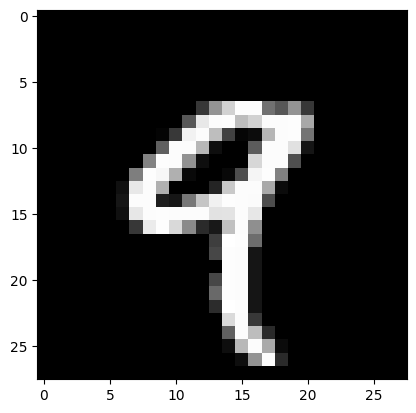

In [13]:
# check on example
image_example = get_item(4)

outputs = model(image_example[0].view(-1, 28*28))
print(outputs)

show_image(4)

In [14]:
# try to load a model from the weights
model2 = LRModel(n_inputs, n_outputs)
model2.load_state_dict(torch.load('model_weights.pth'))

<ipython-input-14-9ffdbb8b5253>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('model_weights.pth'))


<All keys matched successfully>

tensor([[0.0060, 0.0462, 0.0049, 0.0045, 0.7539, 0.0314, 0.0078, 0.2370, 0.0924,
         0.9730]], grad_fn=<SigmoidBackward0>)


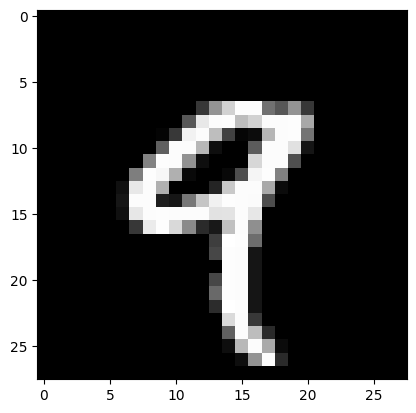

In [15]:
# check on example for new model
image_example = get_item(4)

outputs = model2(image_example[0].view(-1, 28*28))
print(outputs)

show_image(4)